In [ ]:
### import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.tree import plot_tree

#estimators
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#model metrics
from sklearn.metrics import confusion_matrix, classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from feature_engine.discretisers import EqualWidthDiscretiser

In [29]:
data = pd.read_csv("Data_CO2.csv")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   co2_5     36 non-null     float64
 1   Beef5     36 non-null     float64
 2   Dep5      36 non-null     float64
 3   pop_5     36 non-null     float64
 4   hap_5     36 non-null     float64
 5   eco_5     36 non-null     float64
 6   trust_5   36 non-null     float64
 7   health_5  36 non-null     float64
 8   pollutes  36 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 2.7 KB


Text(0, 0.5, 'N')

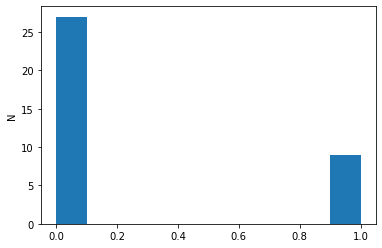

In [58]:
plt.hist(data['pollutes'])
plt.ylabel('N')

In [31]:
#data['CO2_t']=data['co2_1']+data['co2_2']+data['co2_3']+data['co2_4']+data['co2_5']
#data['Beef_t']=data['Beef1']+data['Beef2']+data['Beef3']+data['Beef4']+data['Beef5']
#data['Dep_t']=data['Dep1']+data['Dep2']+data['Dep3']+data['Dep4']+data['Dep5']
#data['pop_t']=data['pop_1']+data['pop_2']+data['pop_3']+data['pop_4']+data['pop_5']


In [32]:
#data_d = EqualWidthDiscretiser(bins=3, variables = ['Beef5'])  ###Produces the same results
#data_d.fit(data)
#data_t = data_d.transform(data)
#data_t.head()
#data = data_t

In [33]:
### Featured sample
X = data.iloc[:,[1,2,3,4,5,6,7]]
X.head()

,Beef5,Dep5,pop_5,hap_5,eco_5,trust_5,health_5
0,974.517333,1215983.0,3.741100e+07,7.278,1.365,0.308,1.039
1,8517.757172,4963752.0,1.433784e+09,5.191,1.029,0.100,0.893
2,741.288517,808265.0,2.706260e+08,5.192,0.931,0.028,0.660
3,1026.711652,1209803.0,1.366418e+09,4.015,0.755,0.085,0.588
4,392.323650,186006.0,8.291400e+07,4.548,1.100,0.125,0.785


In [34]:
y = data['pollutes']

In [35]:
print(y)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
Name: pollutes, dtype: int64


In [36]:
SEED=123

In [37]:
rf = RandomForestClassifier(max_depth=3, random_state=SEED)
dtree = DecisionTreeClassifier(max_depth=3)
gradientb = GradientBoostingClassifier(random_state=SEED)

#KNC =  KNeighborsClassifier(3)
#SVC_l =  SVC(kernel="linear", C=0.025)
#SVC_g =  SVC(gamma=2, C=1)
#GPC =  GaussianProcessClassifier(1.0 * RBF(1.0))
#MLPC = MLPClassifier(alpha=1, max_iter=1000)
#ABC =  AdaBoostClassifier()
#GNB =  GaussianNB()
#QDA =  QuadraticDiscriminantAnalysis()


In [38]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', rf))
algos_Class.append(('Decision Tree Classifier', dtree))
algos_Class.append(('GradientBoostingClassifier', gradientb))
#algos_Class.append(('KNeighborsClassifier', KNC))
#algos_Class.append(('SVC linear', SVC_l))
#algos_Class.append(('SVC gamma', SVC_g))
#algos_Class.append(('GaussianProcessClassifier', GPC))
#algos_Class.append(('MLPClassifier', MLPC))
#algos_Class.append(('AdaBoostClassifier', ABC))
#algos_Class.append(('GaussianNB', GNB))
#algos_Class.append(('QuadraticDiscriminantAnalysis', QDA))




In [39]:
#Building and assesing models
scores = []
names = []
for name, model in algos_Class:
    score = cross_val_score(model, X,y, cv=5, scoring='accuracy')
    names.append(name)
    scores.append(score)

In [40]:
#Output
for i in range(len(names)):
    print(names[i],scores[i].mean())

Random Forest Classifier 0.8607142857142858
Decision Tree Classifier 0.8357142857142857
GradientBoostingClassifier 0.8892857142857142


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [43]:
dt=dtree.fit(X_train, y_train)

In [60]:
gb=gradientb.fit(X_train, y_train)

In [44]:
y_predict = rf.predict(X_test)

In [59]:
y_predict_dt = dt.predict(X_test)

In [61]:
y_predict_gb = gb.predict(X_test)

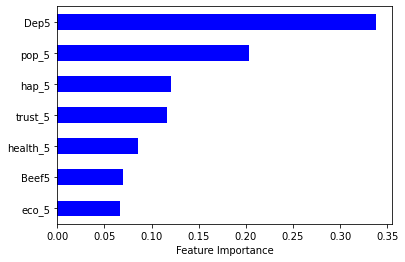

In [46]:
# See Feature importance
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
#Sort importances
sorted_importances_rf = importances_rf.sort_values()
#Show
sorted_importances_rf.plot(kind='barh', color='blue')
plt.xlabel("Feature Importance")
plt.show()

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.67      0.80         3

    accuracy                           0.91        11
   macro avg       0.94      0.83      0.87        11
weighted avg       0.92      0.91      0.90        11



In [66]:
confusion_matrix(y_test, y_predict)

array([[8, 0],
       [1, 2]])

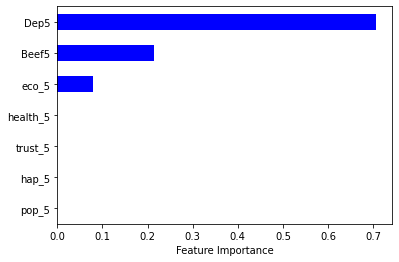

In [62]:
# See Feature importance
importances_dt = pd.Series(dt.feature_importances_, index = X.columns)
#Sort importances
sorted_importances_dt = importances_dt.sort_values()
#Show
sorted_importances_dt.plot(kind='barh', color='blue')
plt.xlabel("Feature Importance")
plt.show()

In [63]:
print(classification_report(y_test, y_predict_dt))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.80      0.88      0.80        11
weighted avg       0.89      0.82      0.83        11



In [67]:
confusion_matrix(y_test, y_predict_dt)

array([[6, 2],
       [0, 3]])

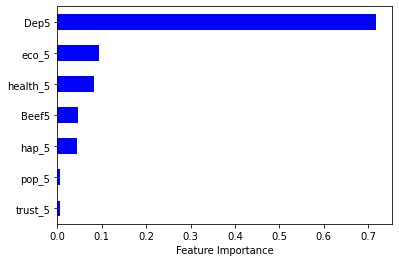

In [64]:
# See Feature importance
importances_gb = pd.Series(gb.feature_importances_, index = X.columns)
#Sort importances
sorted_importances_gb = importances_gb.sort_values()
#Show
sorted_importances_gb.plot(kind='barh', color='blue')
plt.xlabel("Feature Importance")
plt.show()

In [65]:
print(classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.80      0.88      0.80        11
weighted avg       0.89      0.82      0.83        11



In [68]:
confusion_matrix(y_test, y_predict_gb)

array([[6, 2],
       [0, 3]])

In [48]:
rf.n_classes_

2

In [49]:
rf.classes_

array([0, 1])

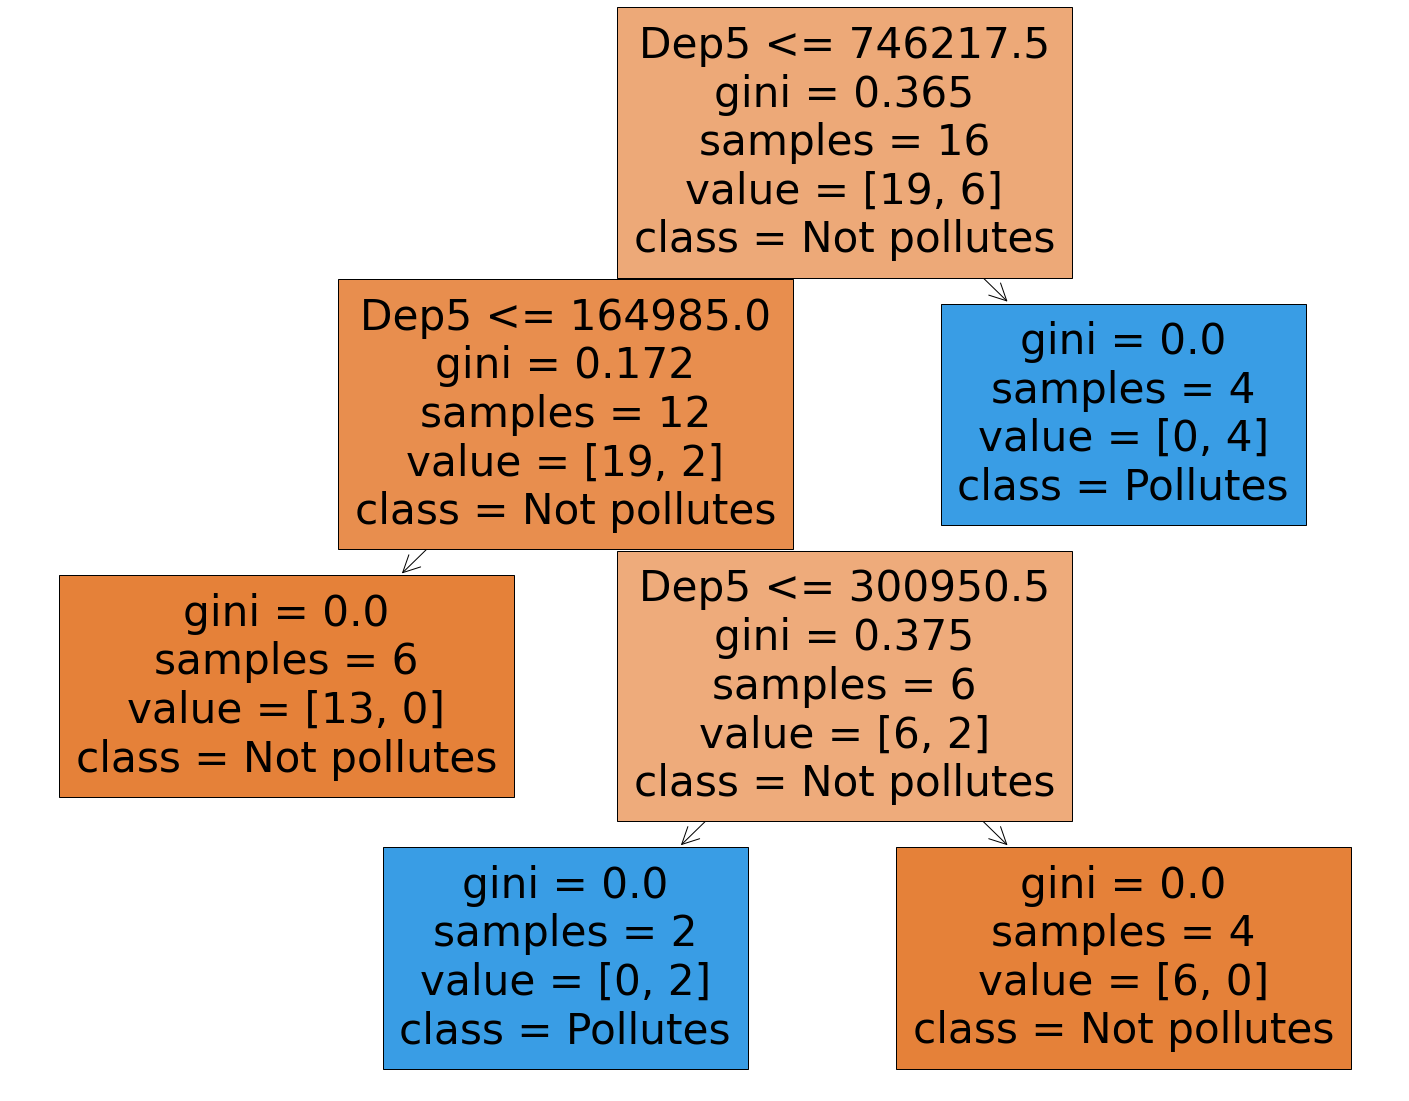

In [50]:
# Extract single tree
estimator = rf.estimators_[0]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(estimator, feature_names=X.columns,class_names=['Not pollutes', 'Pollutes'], filled=True)

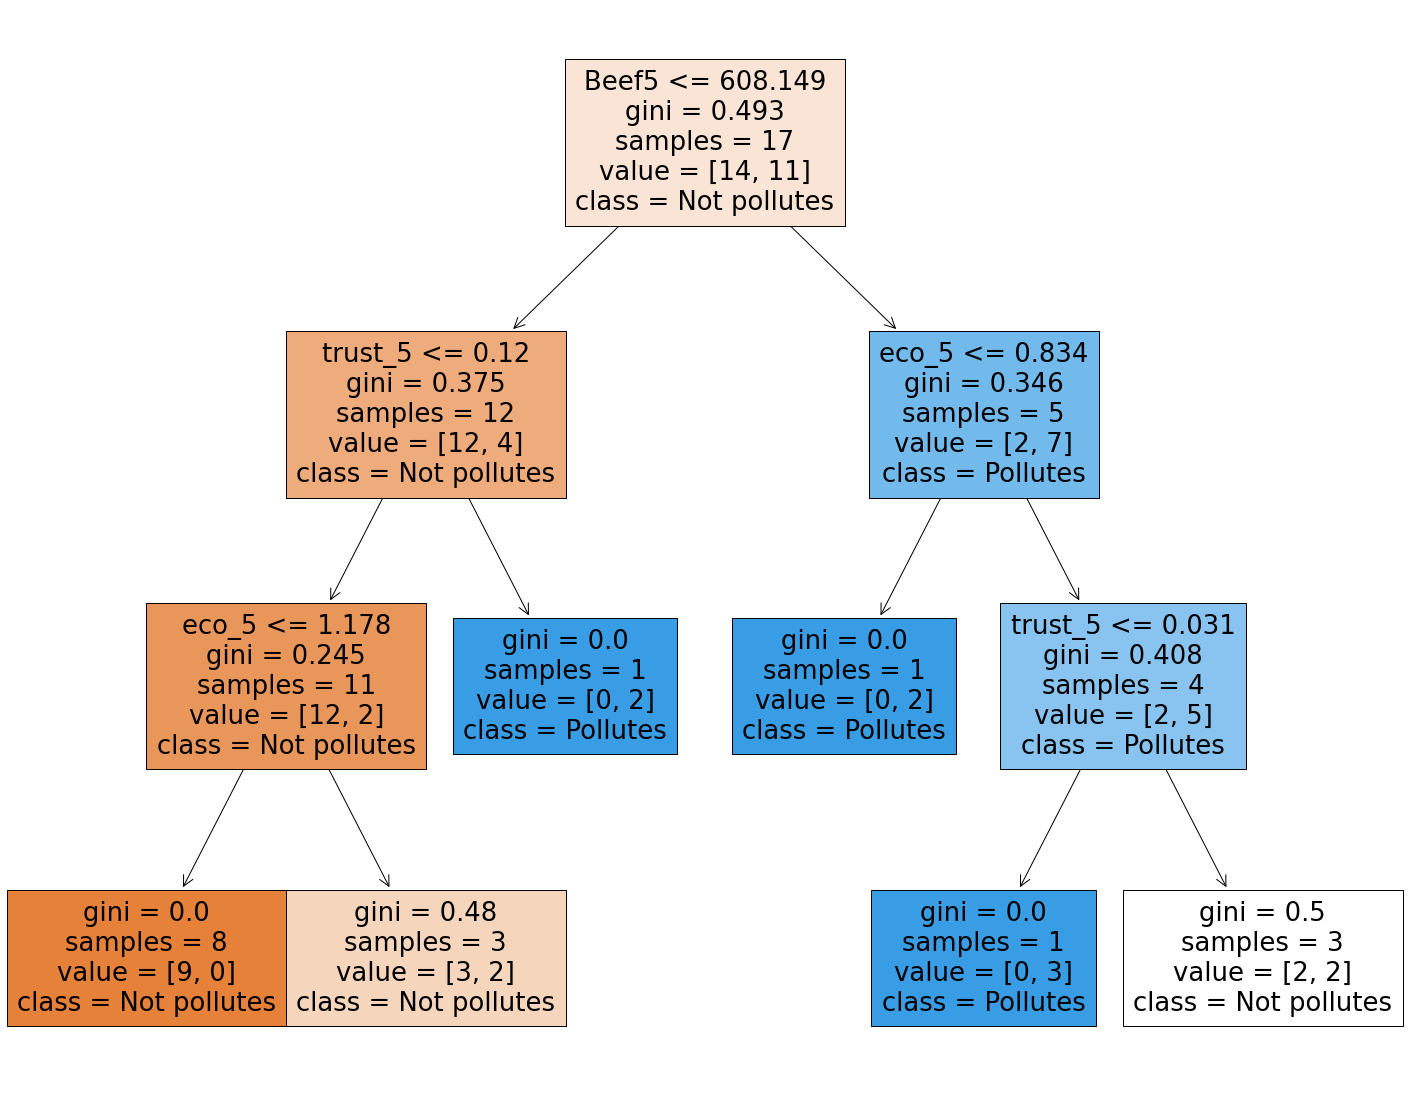

In [51]:
estimator = rf.estimators_[1]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(estimator, feature_names=X.columns,class_names=['Not pollutes', 'Pollutes'], filled=True)

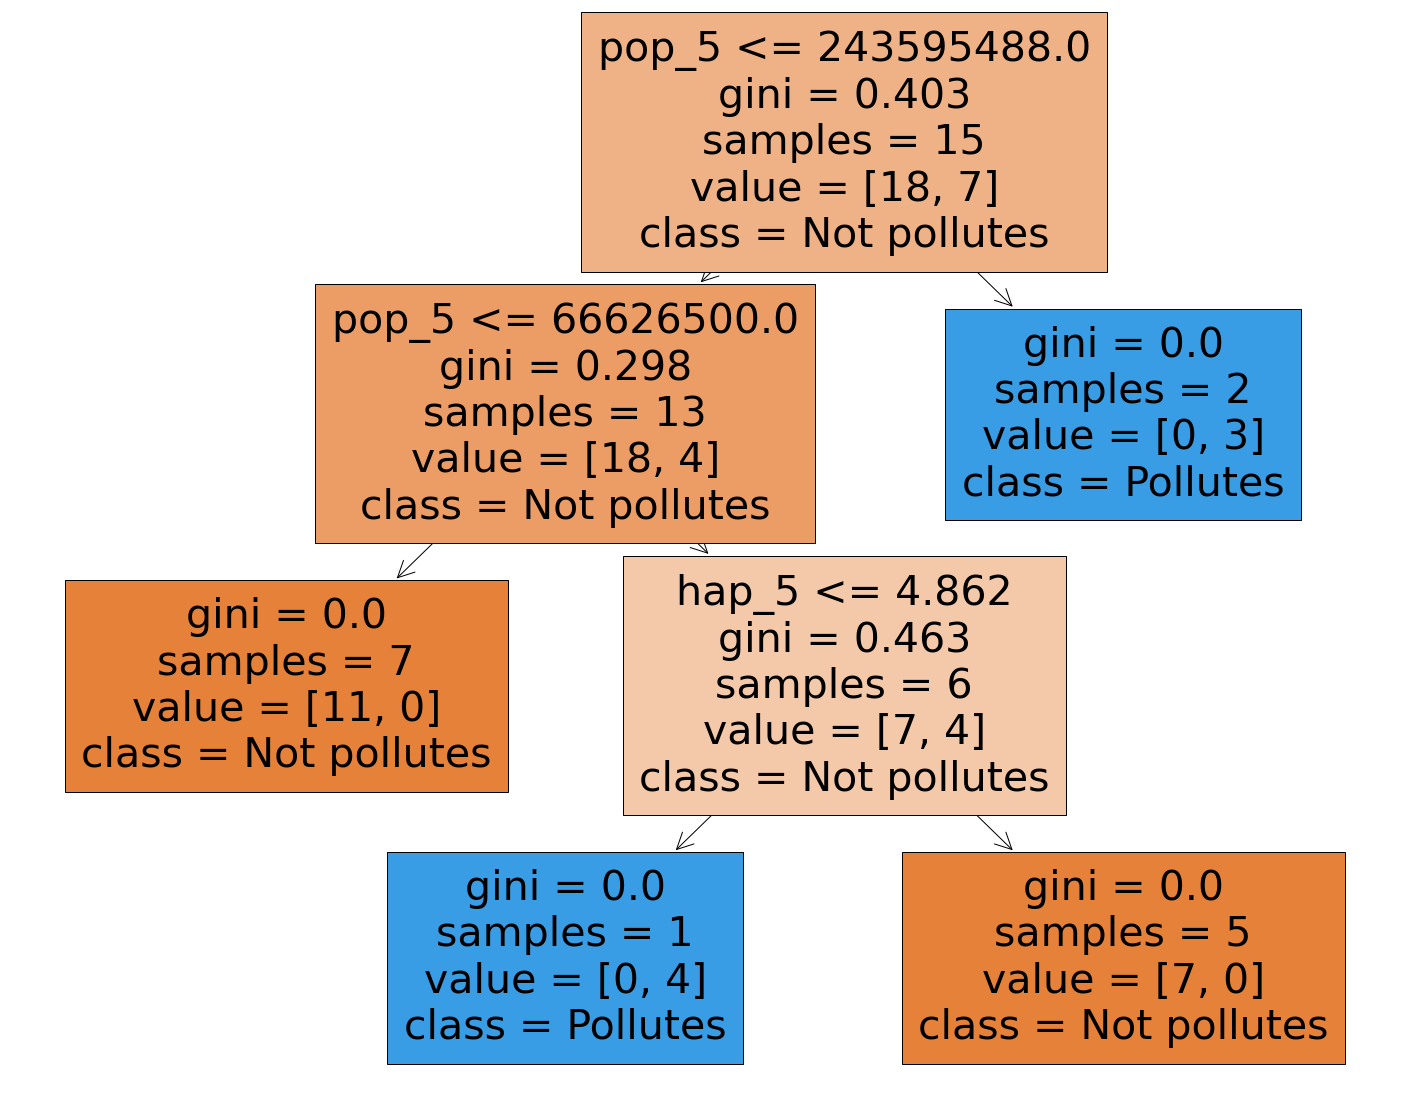

In [52]:
estimator = rf.estimators_[2]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(estimator, feature_names=X.columns,class_names=['Not pollutes', 'Pollutes'], filled=True)

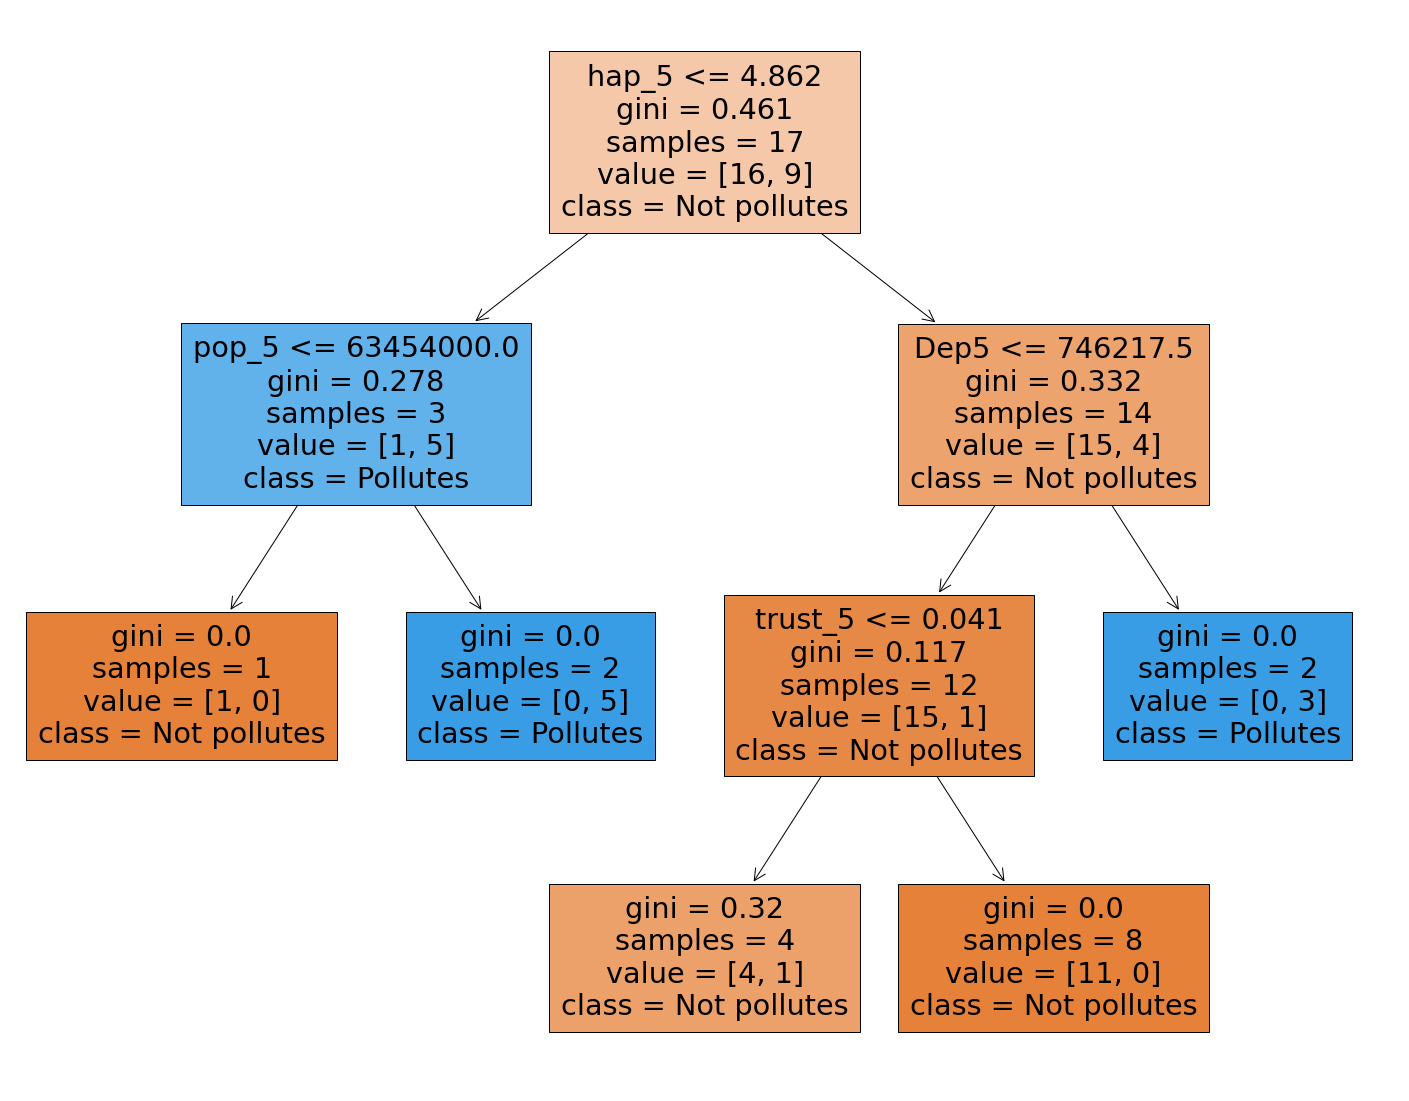

In [53]:
estimator = rf.estimators_[3]
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(estimator, feature_names=X.columns,class_names=['Not pollutes', 'Pollutes'], filled=True)

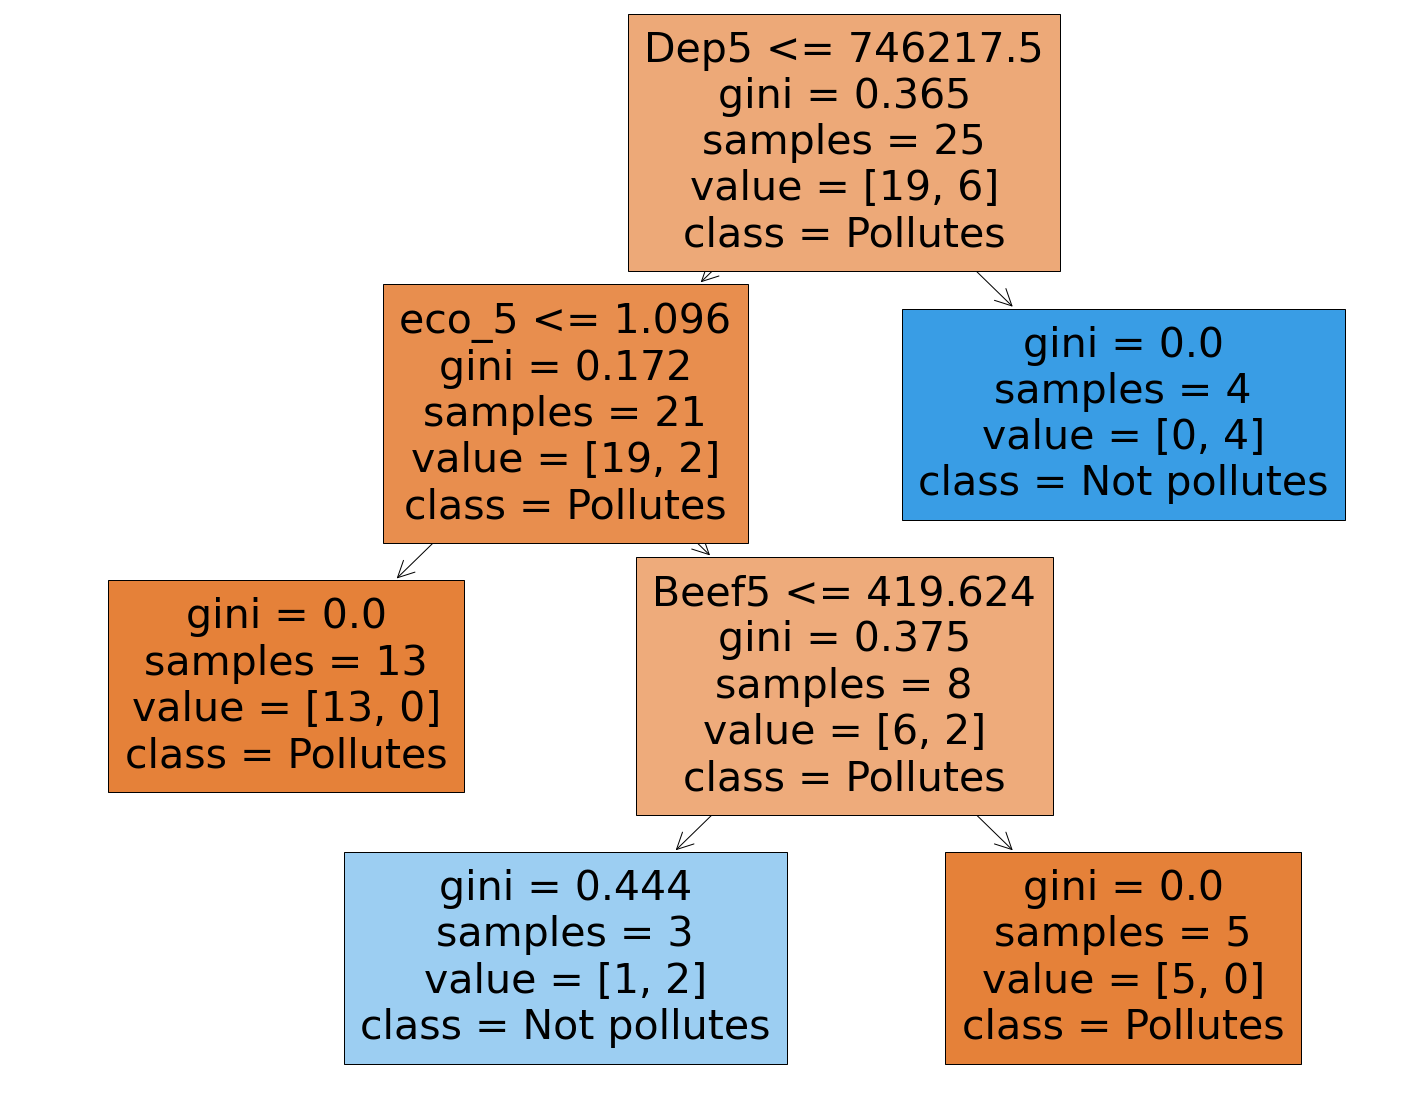

In [54]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dt, feature_names=X.columns,class_names=['Pollutes', 'Not pollutes'], filled=True)